**TENSORFLOW IMAGE CLASSIFICATION WITH FASHION_MNIST DATASET**

***Import Statements***

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/Top', 'Trouser','Pullover', 'Dress','Coat','Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle Boot']

In [6]:
train_images.shape

(60000, 28, 28)

**A Test Color-Bar Plot of Images**

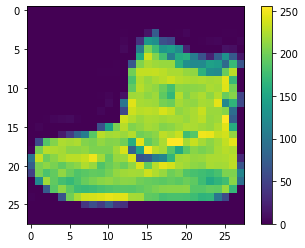

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

**Normalizing the Data**

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

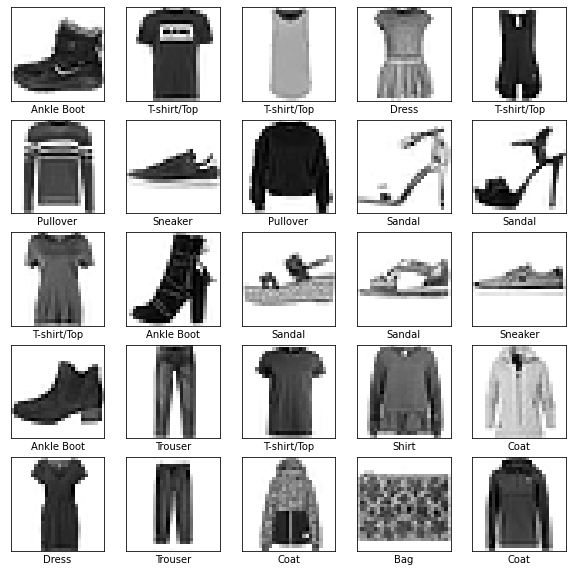

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  
plt.show()

**CREATING THE KERAS MODEL**

In [20]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6287 - accuracy: 0.7823
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3778 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3417 - accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3054 - accuracy: 0.8876
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2938 - accuracy: 0.8929
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2764 - accuracy: 0.8986
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2627 - accuracy: 0.9022
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2523 - accuracy: 0.9056
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2395 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.232

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.8774
Test Accuracy: 0.8773999810218811


In [27]:
predictions = model.predict(test_images)

predictions[0]
np.argmax(predictions[0])

9

In [30]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label=np.argmax(predictions_array)
  if predicted_label == true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array),class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

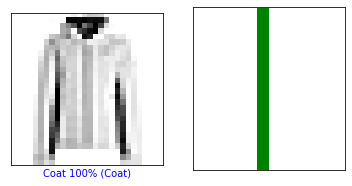

In [34]:
i=6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)

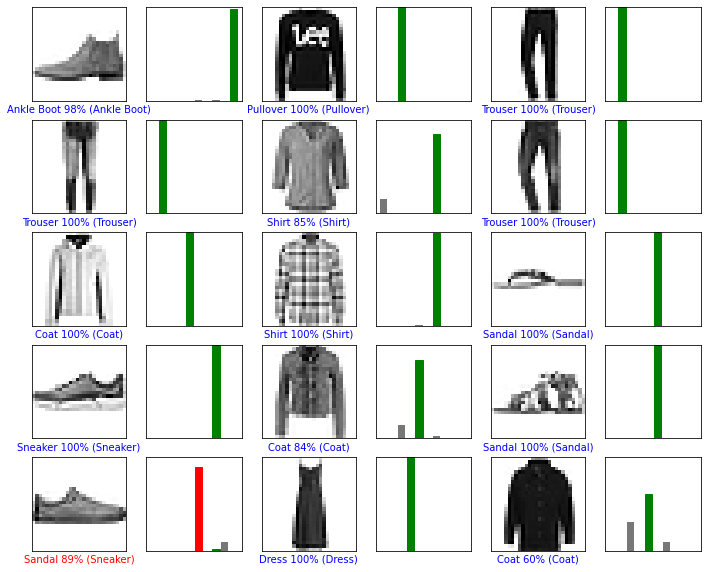

In [36]:
num_rows = 5
num_cols =3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols,2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i,predictions, test_labels)
plt.show()

**PREDICTIONS PERFORMED ON THE TEST IMAGES**

In [40]:
img = test_images[0]
img = (np.expand_dims(img,0))

predictions_single = model.predict(img)
print(predictions_single)

[[8.4152688e-08 2.9531074e-12 2.0408822e-11 1.1395308e-11 1.3545466e-10
  1.4688576e-02 7.4835533e-08 7.2483378e-03 4.2483727e-08 9.7806293e-01]]


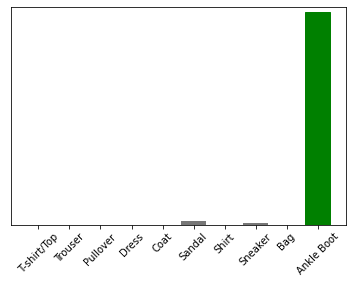

In [41]:
plot_value_array(0,predictions_single, test_labels)
_=plt.xticks(range(10),class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])